📦 This analysis explores shipment patterns, costs, logistics modes, and delivery delays for the pharmaceutical supply chain.
We'll use data science techniques to find business insights and support future decision-making.

-----------------------------------------------------------------------------------------------------------

Shape of dataset: (2838, 33)

Column names:
 ['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']
<class 

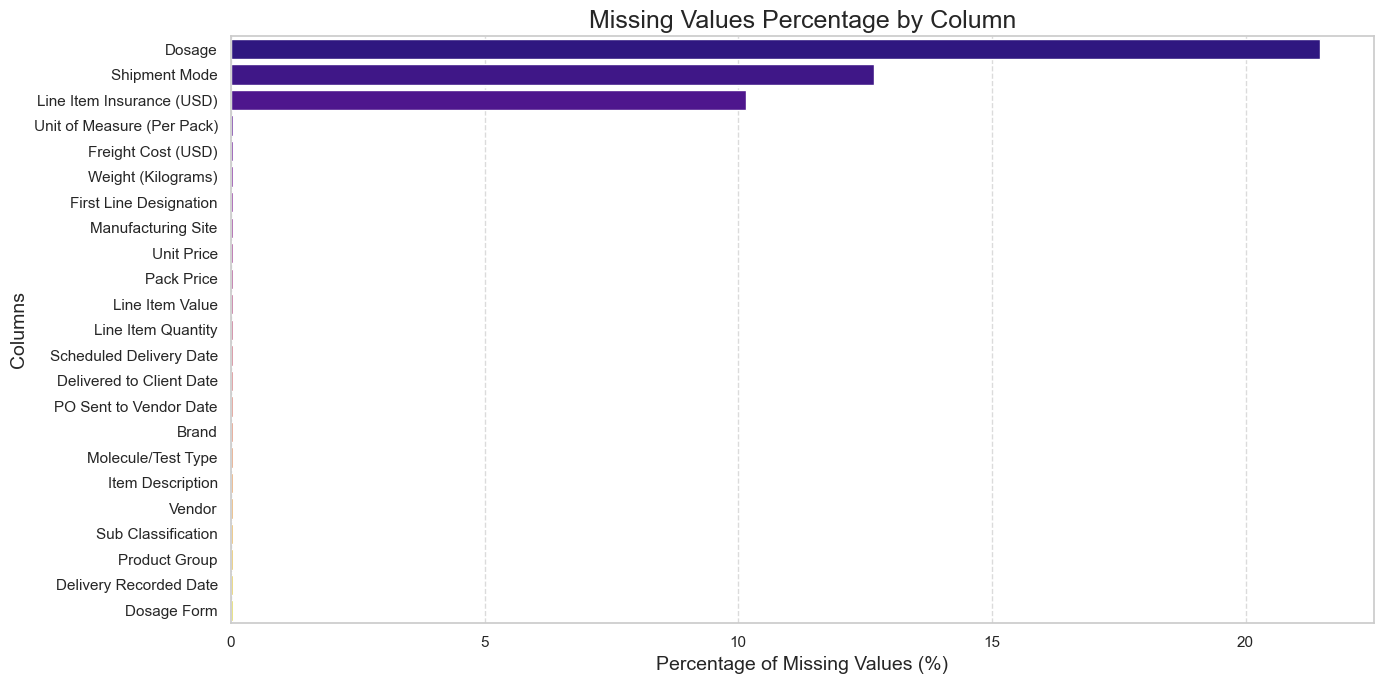

🔍Missing Value Analysis- We checked where missing values occur. Some key fields like 'Shipment Mode' and 'Dosage' are missing. Knowing this helps us plan how to clean the data appropriately.

-----------------------------------------------------------------------------------------------------------

🧹 Data Cleaning - We cleaned the data by filling missing shipment modes, converting date fields properly, and ensuring freight and insurance costs are treated as numbers. A clean dataset is essential for meaningful analysis.

-----------------------------------------------------------------------------------------------------------

⚙️Feature Engineering- Engineered new features like Delivered Year, Month, Quarter, and calculated Total Shipping Cost. These will help us explore time-based trends and financial insights in shipments.

-----------------------------------------------------------------------------------------------------------



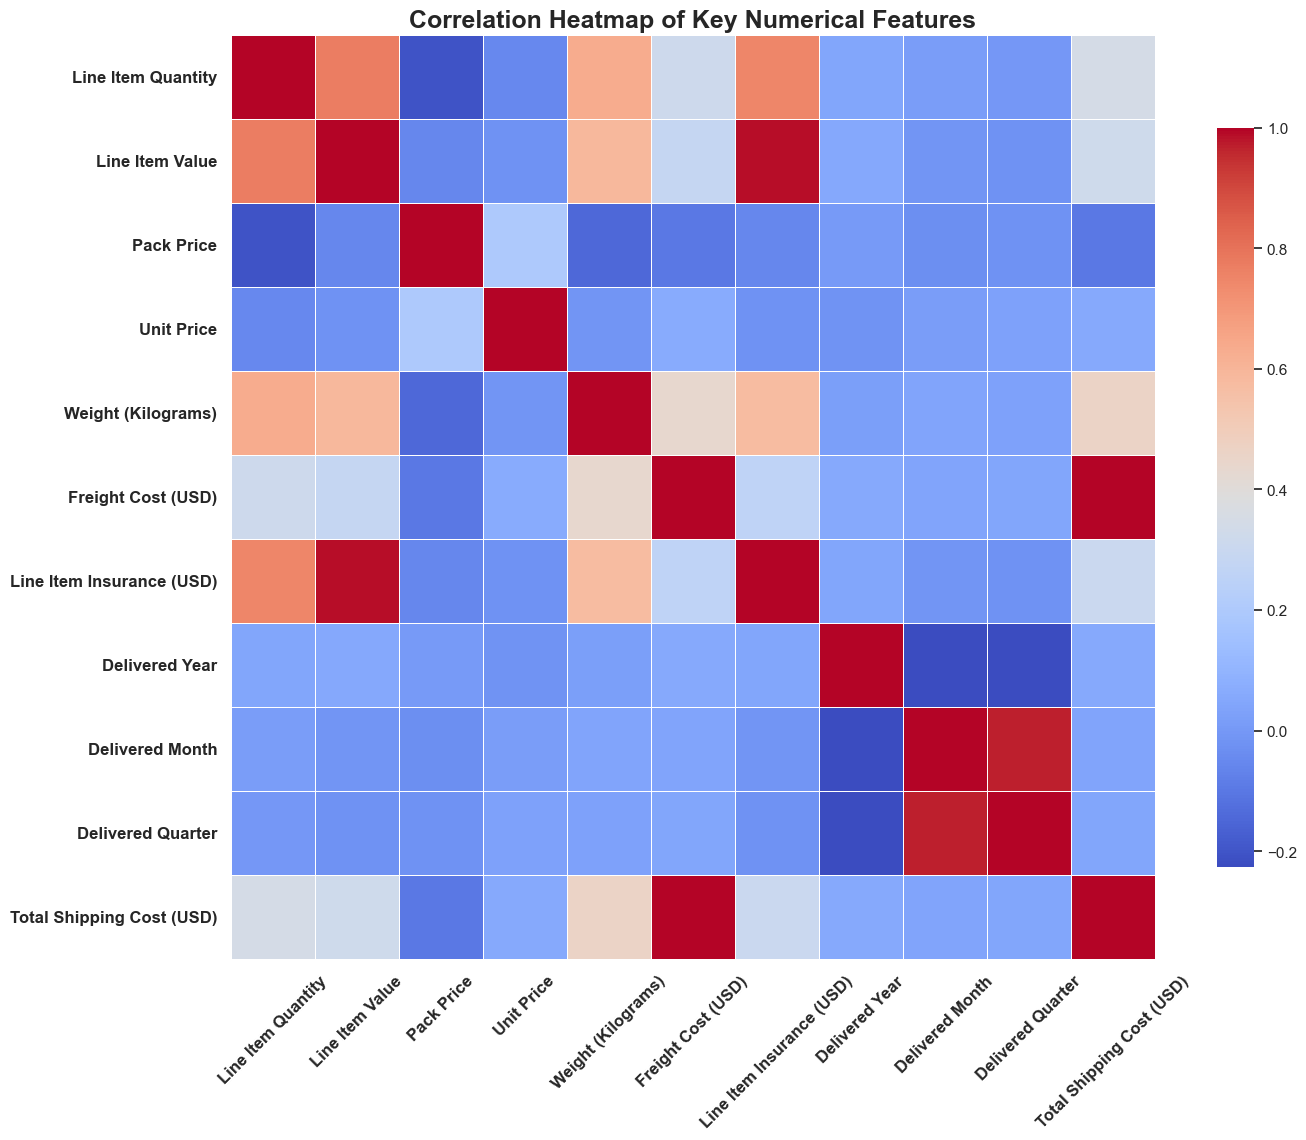

📊 The correlation heatmap shows relationships among key variables. For example, does weight strongly correlate with freight cost? Finding such links can help us optimize operations later.

-----------------------------------------------------------------------------------------------------------



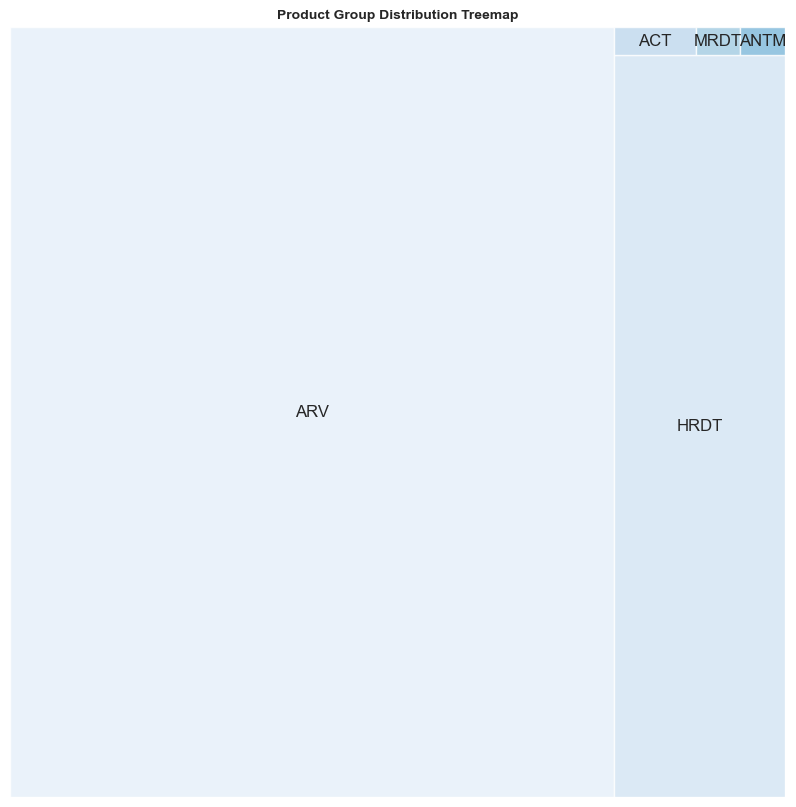

📦 Top Product Groups-  We explored which product groups were delivered the most. Understanding top categories helps businesses prioritize production and logistics efforts for key medicines.

-----------------------------------------------------------------------------------------------------------



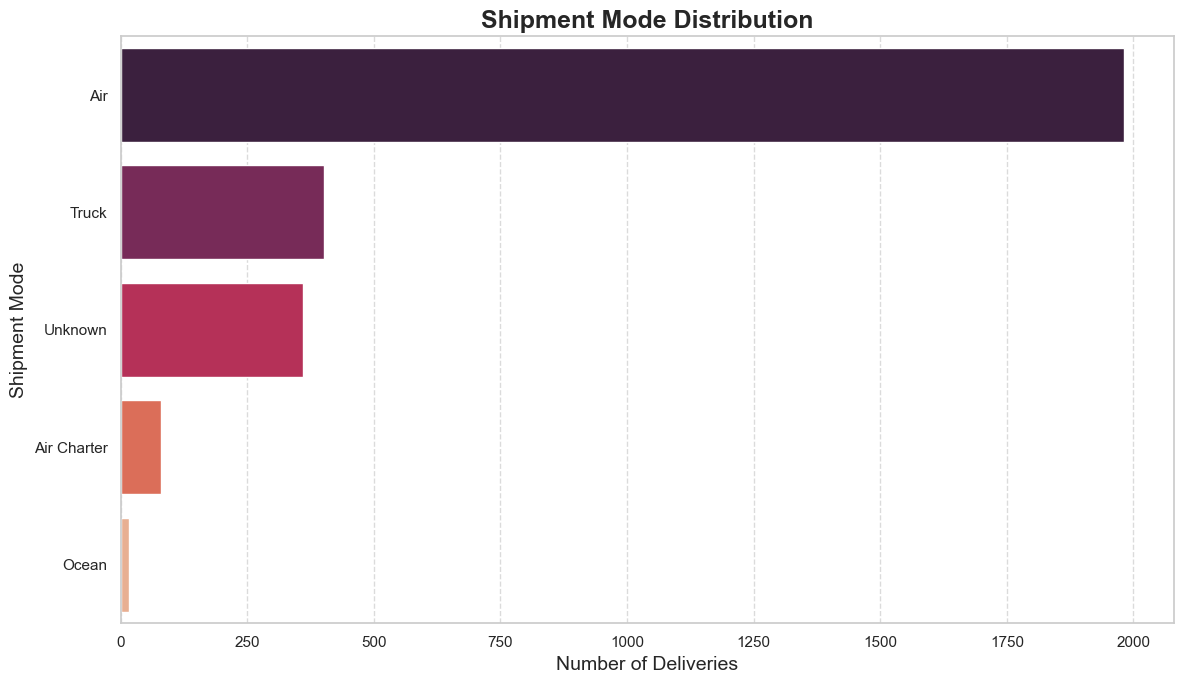

✈️ Shipment Mode Distribution- Here we checked how shipments were fulfilled — air, sea, or RDC. Shipment modes affect cost, speed, and inventory planning decisions.

-----------------------------------------------------------------------------------------------------------



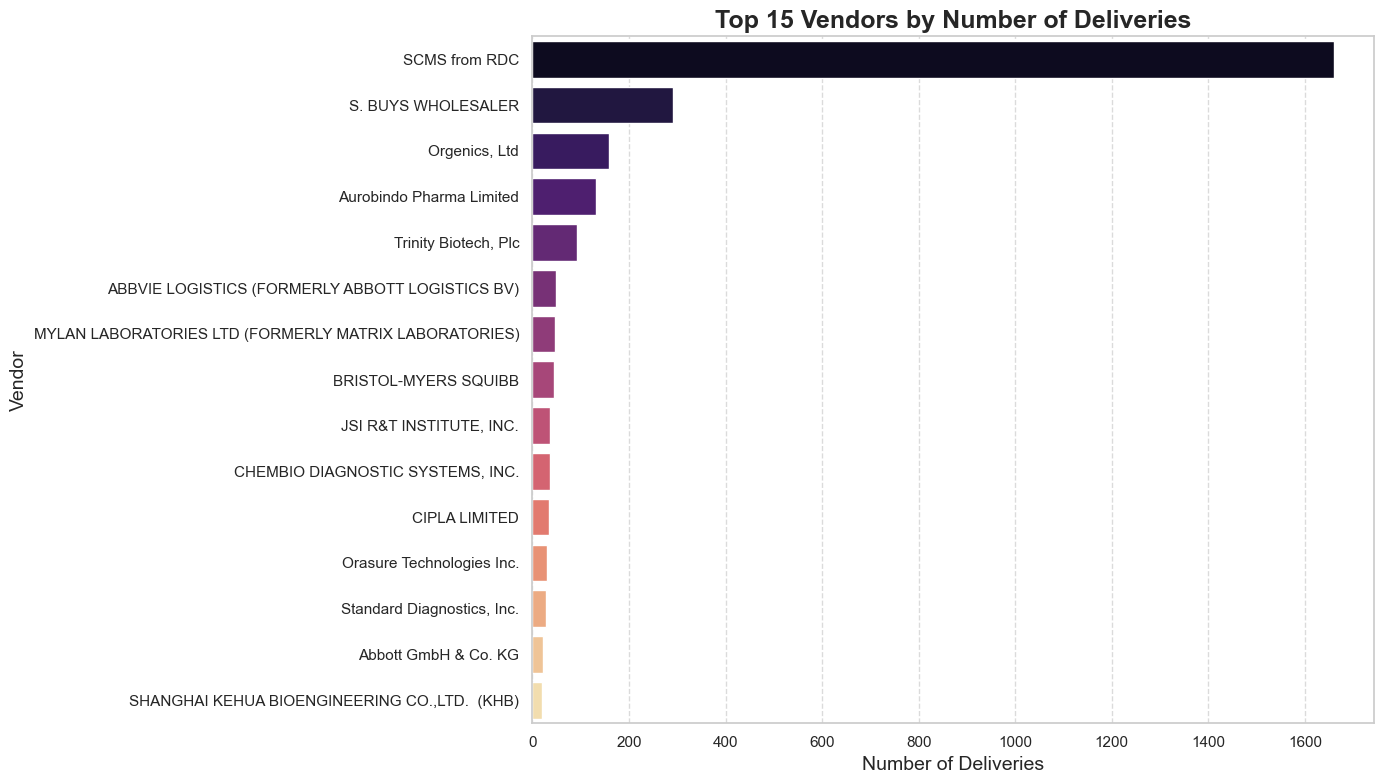

🏢 Here we identified the top 15 vendors supplying the most shipments. Tracking vendor performance helps manage supplier relationships and ensures supply reliability.

-----------------------------------------------------------------------------------------------------------



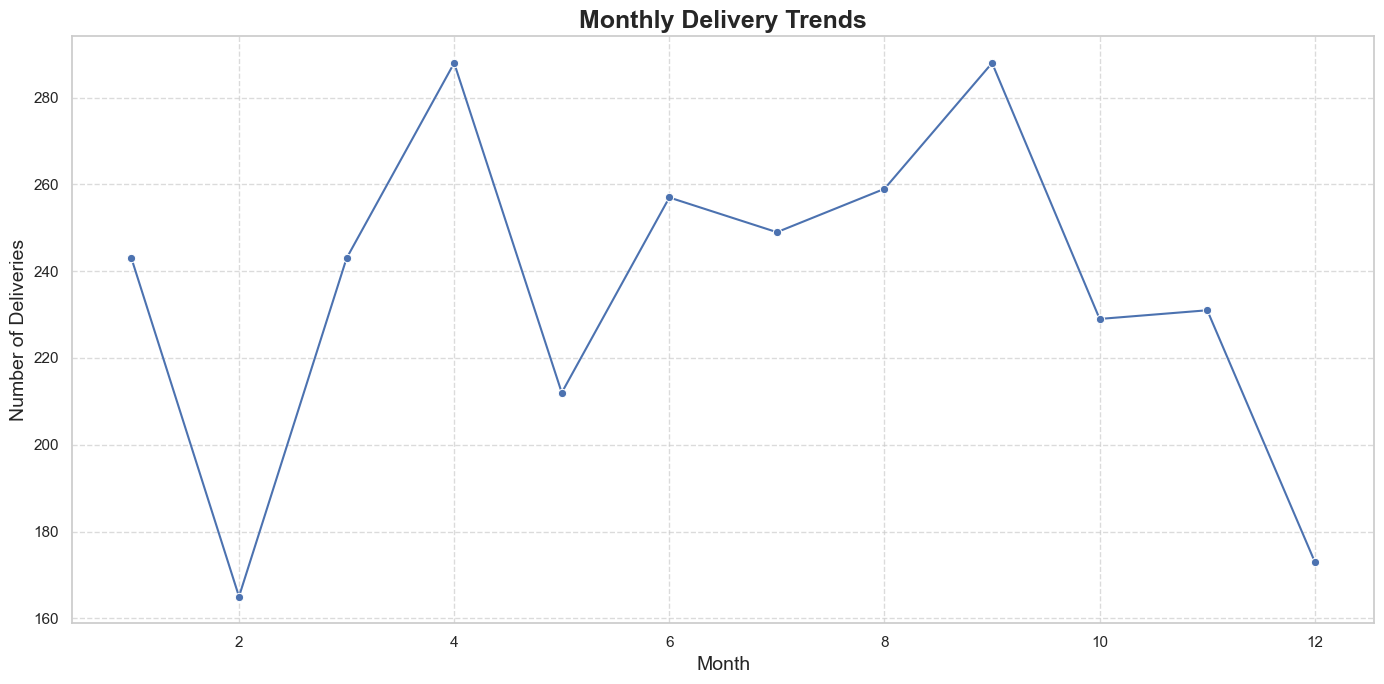

📅 Monthly delivery patterns show if there are seasonal spikes. This can help in workforce planning, warehouse stocking, and managing inventory risks.

-----------------------------------------------------------------------------------------------------------



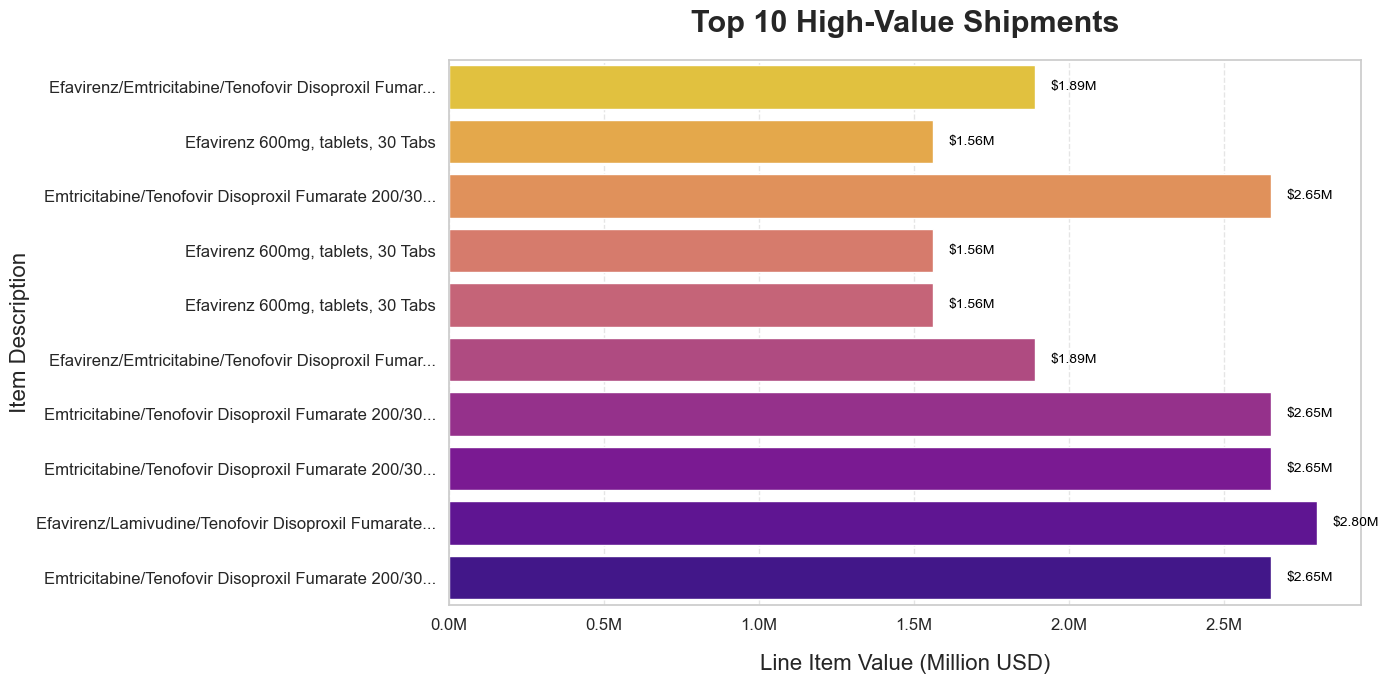

💰 We found the highest value shipments. Knowing which items drive the most revenue is crucial for pricing, insurance, and risk planning.

-----------------------------------------------------------------------------------------------------------



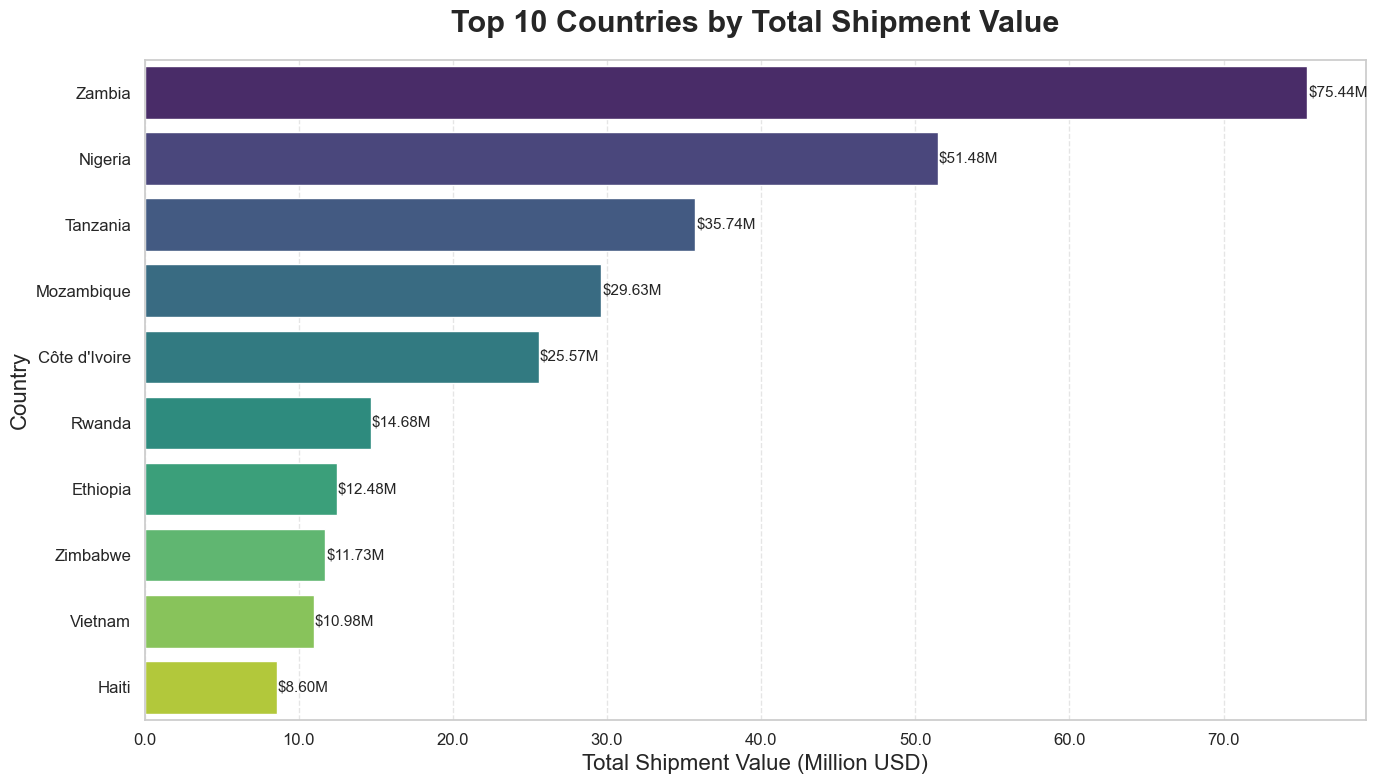

🌍 Which countries bring the highest value? Targeting high-value markets can improve logistics strategy and optimize international shipping routes.

-----------------------------------------------------------------------------------------------------------



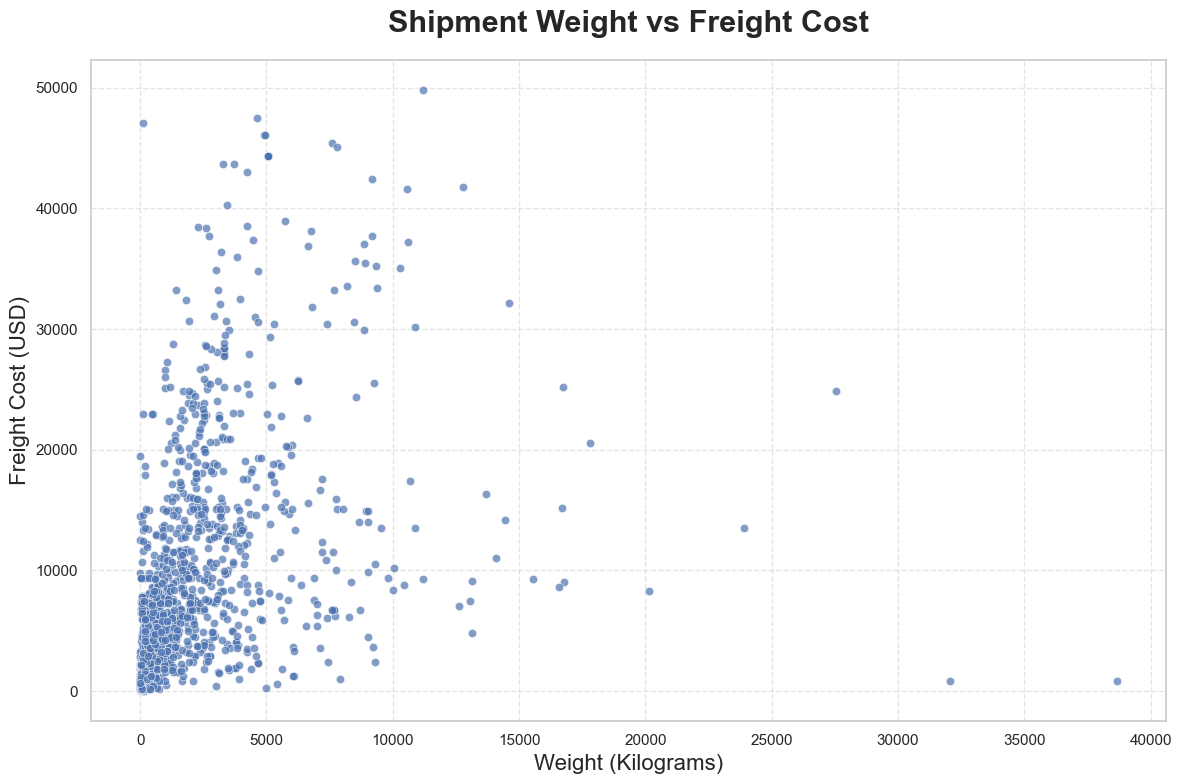

⚖️ Efficiency Anlysis-  We explored how freight cost relates to shipment weight. This can uncover if heavier shipments are optimally priced and if bulk shipping discounts are being applied.

-----------------------------------------------------------------------------------------------------------



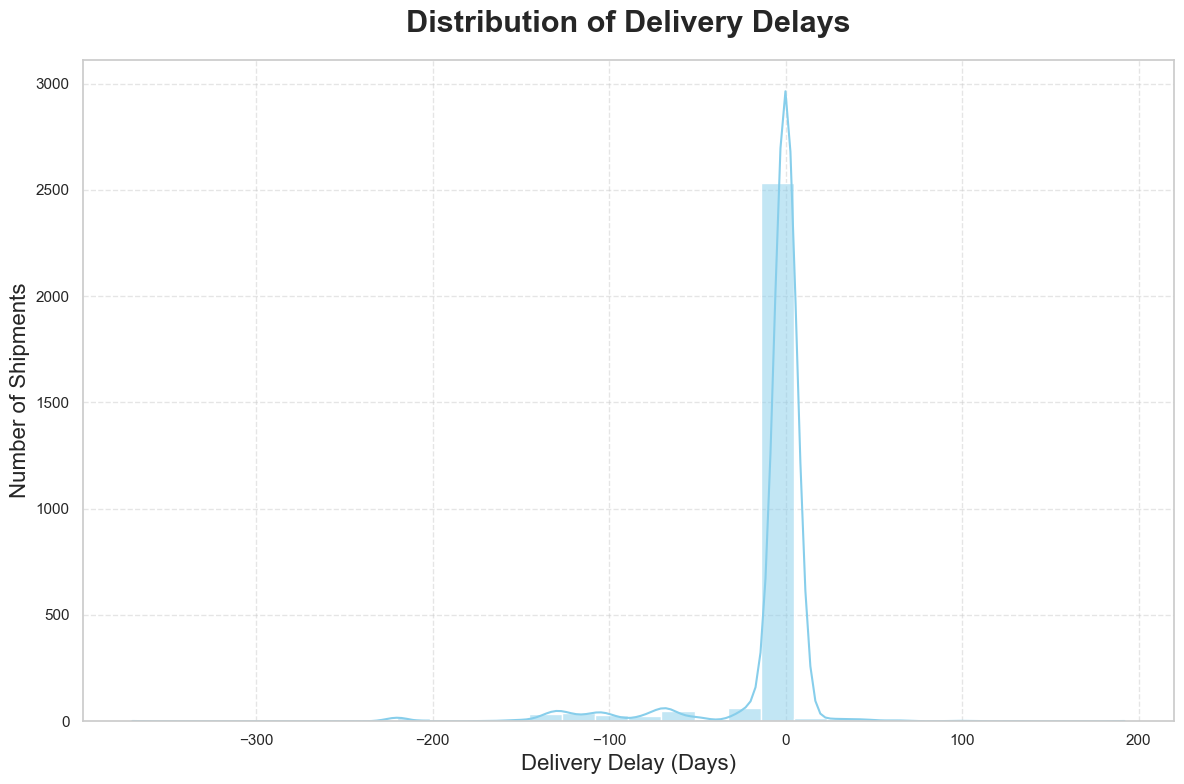

⏰ We analyzed delays in deliveries. Delay patterns can help identify weak links in the supply chain and plan better vendor coordination or faster shipment methods.

-----------------------------------------------------------------------------------------------------------

📋 Final Missing Values Overview after cleaning:
PO Sent to Vendor Date       68.111346
Total Shipping Cost (USD)    47.216350
Freight Cost (USD)           40.451022
Weight (Kilograms)           39.852008
Dosage                       21.458774
Line Item Insurance (USD)    10.147992
Pack Price                    0.035236
Delivered Quarter             0.035236
Delivered Month               0.035236
Delivered Year                0.035236
First Line Designation        0.035236
Manufacturing Site            0.035236
Unit Price                    0.035236
Line Item Value               0.035236
Scheduled Delivery Date       0.035236
Line Item Quantity            0.035236
Dosage Form                   0.035236
Brand          

In [7]:
# -----------------------------------------------
# 1. Introduction
# -----------------------------------------------

# "This EDA analyzes shipment patterns, costs, logistics modes, and delays within the pharmaceutical supply chain to support business insights and future forecasting."

print("📦 This analysis explores shipment patterns, costs, logistics modes, and delivery delays for the pharmaceutical supply chain.")
print("We'll use data science techniques to find business insights and support future decision-making.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 2. Load Data and Setup
# -----------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')


# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14,7)

# Load dataset
df = pd.read_csv('SCMS_Delivery_History_Dataset_20150929.csv', encoding='latin1')
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print(df.info())
print(df.describe(include='all'))

print("📥 We loaded the dataset and did a quick scan to understand its structure."
      " Setting up our libraries and exploring the data are always the first steps before serious work begins.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 3. Missing Value Analysis
# -----------------------------------------------

missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette="plasma")
plt.title('Missing Values Percentage by Column', fontsize=18)
plt.xlabel('Percentage of Missing Values (%)', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("🔍Missing Value Analysis- We checked where missing values occur. Some key fields like 'Shipment Mode' and 'Dosage' are missing."
      " Knowing this helps us plan how to clean the data appropriately.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 4. Data Cleaning
# -----------------------------------------------

# Fill missing 'Shipment Mode' with 'Unknown'
df['Shipment Mode'] = df['Shipment Mode'].fillna('Unknown')

# Convert Dates
date_cols = ['Delivered to Client Date', 'Scheduled Delivery Date', 'PO Sent to Vendor Date', 'Delivery Recorded Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert Freight, Insurance, Weight to Numeric
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')
df['Line Item Insurance (USD)'] = pd.to_numeric(df['Line Item Insurance (USD)'], errors='coerce')
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')

print("🧹 Data Cleaning - We cleaned the data by filling missing shipment modes, converting date fields properly,"
      " and ensuring freight and insurance costs are treated as numbers."
      " A clean dataset is essential for meaningful analysis.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 5. Feature Engineering
# -----------------------------------------------

# Derive Delivered Year, Month, Quarter
df['Delivered Year'] = df['Delivered to Client Date'].dt.year
df['Delivered Month'] = df['Delivered to Client Date'].dt.month
df['Delivered Quarter'] = df['Delivered to Client Date'].dt.quarter

# Create Total Shipping Cost
df['Total Shipping Cost (USD)'] = df['Freight Cost (USD)'] + df['Line Item Insurance (USD)']

print("⚙️Feature Engineering- Engineered new features like Delivered Year, Month, Quarter,"
      " and calculated Total Shipping Cost. These will help us explore"
      " time-based trends and financial insights in shipments.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 6. Correlation Heatmap
# -----------------------------------------------

# Drop irrelevant columns
columns_to_drop = ['ID', 'Unit of Measure (Per Pack)', 'Delivery Year', 'Delivery Month', 'Delivery Quarter']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Filter numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_corr = df[numerical_cols]

# Drop columns with more than 50% missing values
missing_threshold = 0.5
df_corr = df_corr.loc[:, df_corr.isnull().mean() < missing_threshold]

# Drop columns with no variance
constant_columns = [col for col in df_corr.columns if df_corr[col].nunique() <= 1]
df_corr = df_corr.drop(columns=constant_columns)

# Drop rows with missing values
df_corr_clean = df_corr.dropna()

# Correlation Matrix
corr_matrix = df_corr_clean.corr()

# Plot
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, linewidths=0.7, linecolor='white', cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.title('Correlation Heatmap of Key Numerical Features', fontsize=18, fontweight='bold')
plt.show()

print("📊 The correlation heatmap shows relationships among key variables."
      " For example, does weight strongly correlate with freight cost?"
      " Finding such links can help us optimize operations later.")
print("\n-----------------------------------------------------------------------------------------------------------\n")



# -----------------------------------------------
# 7. Shipment Analysis
# 7.1 Top Product Groups (Treemap)
# -----------------------------------------------

top_products = df['Product Group'].value_counts().head(10)

plt.figure(figsize=(10,10))
squarify.plot(sizes=top_products.values, label=top_products.index, alpha=0.8, color=sns.color_palette('Blues', n_colors=10))
plt.title('Product Group Distribution Treemap', fontsize=10, weight='bold')
plt.axis('off')
plt.show()

print("📦 Top Product Groups-  We explored which product groups were delivered the most."
      " Understanding top categories helps businesses prioritize production"
      " and logistics efforts for key medicines.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 7.2 Shipment Mode Distribution
# -----------------------------------------------

delivery_modes = df['Shipment Mode'].value_counts()

plt.figure(figsize=(12,7))
sns.barplot(y=delivery_modes.index, x=delivery_modes.values, palette="rocket")
plt.title('Shipment Mode Distribution', fontsize=18, weight='bold')
plt.xlabel('Number of Deliveries', fontsize=14)
plt.ylabel('Shipment Mode', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("✈️ Shipment Mode Distribution- Here we checked how shipments were fulfilled — air, sea, or RDC."
      " Shipment modes affect cost, speed, and inventory planning decisions.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 7.3 Vendor Top 15 Deliveries
# -----------------------------------------------

top_vendors = df['Vendor'].value_counts().head(15)

plt.figure(figsize=(14,8))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='magma')
plt.title('Top 15 Vendors by Number of Deliveries', fontsize=18, weight='bold')
plt.xlabel('Number of Deliveries', fontsize=14)
plt.ylabel('Vendor', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("🏢 Here we identified the top 15 vendors supplying the most shipments."
      " Tracking vendor performance helps manage supplier relationships"
      " and ensures supply reliability.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 7.4 Monthly Delivery Trends
# -----------------------------------------------

monthly_trends = df['Delivered Month'].value_counts().sort_index()

plt.figure(figsize=(14,7))
sns.lineplot(x=monthly_trends.index, y=monthly_trends.values, marker='o')
plt.title('Monthly Delivery Trends', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Deliveries', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("📅 Monthly delivery patterns show if there are seasonal spikes."
      " This can help in workforce planning, warehouse stocking,"
      " and managing inventory risks.")
print("\n-----------------------------------------------------------------------------------------------------------\n")

# -----------------------------------------------
# 8. Cost and Value Analysis
# 8.1 Top 10 Expensive Shipments
# -----------------------------------------------

import matplotlib.ticker as ticker

# Drop missing and negative values
df_top = df[['Item Description', 'Line Item Value']].dropna()
df_top = df_top[df_top['Line Item Value'] > 0]

# Sort and pick top 10
top_expensive = df_top.sort_values(by='Line Item Value', ascending=False).head(10)

# Truncate names for y-axis
def truncate_name(x, length=50):
    return x if len(x) <= length else x[:length] + '...'

top_expensive['Item Description Short'] = top_expensive['Item Description'].apply(lambda x: truncate_name(str(x), 50))

# Set figure size
plt.figure(figsize=(14, 7))

# Create barplot
ax = sns.barplot(
    x='Line Item Value', 
    y='Item Description Short', 
    data=top_expensive,
    order=top_expensive.sort_values('Line Item Value', ascending=False)['Item Description Short'],
    palette='plasma',
    ci=None
)

# Set titles and axis labels
plt.title('Top 10 High-Value Shipments', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Line Item Value (Million USD)', fontsize=16, labelpad=15)
plt.ylabel('Item Description', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format x-axis into Millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# Add values inside bars neatly
for p in ax.patches:
    ax.annotate(f"${p.get_width()/1e6:.2f}M",
                (p.get_width() + 50000, p.get_y() + p.get_height() / 2),
                va='center', fontsize=10, color='black')

ax.invert_yaxis()

# Optional: very soft grid
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Tight layout
plt.tight_layout()
plt.show()


print("💰 We found the highest value shipments."
      " Knowing which items drive the most revenue is crucial for pricing,"
      " insurance, and risk planning.")
print("\n-----------------------------------------------------------------------------------------------------------\n")



# -----------------------------------------------
# 8.2 Top Countries by Shipment Value
# -----------------------------------------------

# Grouping data
df_country = df[['Country', 'Line Item Value']].dropna()
df_country = df_country[df_country['Line Item Value'] > 0]
country_value = df_country.groupby('Country')['Line Item Value'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(14,8))
ax = sns.barplot(x=country_value.values, y=country_value.index, palette='viridis')

# Title and labels
plt.title('Top 10 Countries by Total Shipment Value', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Total Shipment Value (Million USD)', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format x-axis to millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}'))

# Add values at end of bars
for index, value in enumerate(country_value.values):
    plt.text(value + 50000, index, f"${value/1e6:.2f}M", va='center', fontsize=11)

# Grid
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("🌍 Which countries bring the highest value?"
      " Targeting high-value markets can improve logistics strategy"
      " and optimize international shipping routes.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 9. Efficiency Analysis
# 9.1 Shipment Weight vs Freight Cost
# -----------------------------------------------

# Prepare data
df_scatter = df[['Weight (Kilograms)', 'Freight Cost (USD)']].dropna()
df_scatter = df_scatter[(df_scatter['Weight (Kilograms)'] > 0) & (df_scatter['Freight Cost (USD)'] > 0)]

# Remove extreme outliers
df_scatter = df_scatter[df_scatter['Weight (Kilograms)'] < 50000]
df_scatter = df_scatter[df_scatter['Freight Cost (USD)'] < 50000]

# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weight (Kilograms)', y='Freight Cost (USD)', data=df_scatter, alpha=0.7)
plt.title('Shipment Weight vs Freight Cost', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Weight (Kilograms)', fontsize=16)
plt.ylabel('Freight Cost (USD)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("⚖️ Efficiency Anlysis-  We explored how freight cost relates to shipment weight."
      " This can uncover if heavier shipments are optimally priced"
      " and if bulk shipping discounts are being applied.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 10. Risk Analysis
# 10.1 Delivery Delay Distribution
# -----------------------------------------------

# Calculate Delivery Delay
df['Delivery Delay (Days)'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

# Drop missing
df_delay = df[['Delivery Delay (Days)']].dropna()

# Plot
plt.figure(figsize=(12,8))
sns.histplot(df_delay['Delivery Delay (Days)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delivery Delays', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Delivery Delay (Days)', fontsize=16)
plt.ylabel('Number of Shipments', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("⏰ We analyzed delays in deliveries."
      " Delay patterns can help identify weak links in the supply chain"
      " and plan better vendor coordination or faster shipment methods.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 11. Final Cleanup and Summary
# -----------------------------------------------

# Final missing value check
missing_final = (df.isnull().sum() / len(df)) * 100
missing_final = missing_final[missing_final > 0].sort_values(ascending=False)


print("📋 Final Missing Values Overview after cleaning:")
print(missing_final)

print("✅ We cleaned the dataset as much as possible."
      " Remaining minor missing values are acceptable,"
      " especially in non-critical fields like Dosage.")
print("\n-----------------------------------------------------------------------------------------------------------\n")


# -----------------------------------------------
# 12. Conclusion
# -----------------------------------------------

print("🔍 Overall, we successfully explored:")
print("- Product distribution trends.")
print("- Shipment modes and vendor performances.")
print("- Cost-heavy shipments and top countries.")
print("- Freight efficiency by shipment weight.")
print("- Risks related to delivery delays.")

print("\n💡 This EDA provides valuable insights to strengthen the pharmaceutical supply chain."
      " It sets the stage for deeper forecasting, cost optimization, and risk mitigation projects ahead!")